In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# loading data

In [7]:
submission_df = pd.read_csv('/kaggle/output/sample_submission.csv')

print(submission_df.shape)
submission_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/output/sample_submission.csv'

In [3]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
print(test_df.shape)
test_df.head()

(110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
print(train_df.shape)
train_df.head()

(165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_df.info()
# no null df but too big size (20MB limit in kaggle)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
test_df.info()
# no null df but still big size 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


# column description

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


# generate new Features and selection

In [8]:
train_df['CreditScore_to_Age'] = train_df['CreditScore'] / train_df['Age']
# train_df['Balance_to_Age'] = train_df['Balance'] / train_df['Age']
# train_df['Age_Tenure'] = train_df['Age'] - train_df['Tenure']
train_df['NumOfProducts_to_Tenure'] = train_df['NumOfProducts'] / (train_df['Tenure']+1)
# train_df['CreditScore_to_Salary'] = train_df['CreditScore'] / train_df['EstimatedSalary']
train_df['Balance_to_Salary'] = train_df['Balance'] / train_df['EstimatedSalary']
# train_df['NumOfProducts_to_Salary'] = train_df['NumOfProducts'] / train_df['EstimatedSalary']

test_df['CreditScore_to_Age'] = test_df['CreditScore'] / test_df['Age']
# test_df['Balance_to_Age'] = test_df['Balance'] / test_df['Age']
# test_df['Age_Tenure'] = test_df['Age'] - test_df['Tenure']
test_df['NumOfProducts_to_Tenure'] = test_df['NumOfProducts'] / (test_df['Tenure']+1)
# test_df['CreditScore_to_Salary'] = test_df['CreditScore'] / test_df['EstimatedSalary']
test_df['Balance_to_Salary'] = test_df['Balance'] / test_df['EstimatedSalary']
# test_df['NumOfProducts_to_Salary'] = test_df['NumOfProducts'] / test_df['EstimatedSalary']

# feature, target and test data

In [9]:
feature = train_df.drop(["id", "CustomerId", "Surname", "Exited"], axis=1)
target = train_df['Exited']
test = test_df.drop(["id","CustomerId", "Surname"], axis=1)

In [10]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CreditScore              165034 non-null  int64  
 1   Geography                165034 non-null  object 
 2   Gender                   165034 non-null  object 
 3   Age                      165034 non-null  float64
 4   Tenure                   165034 non-null  int64  
 5   Balance                  165034 non-null  float64
 6   NumOfProducts            165034 non-null  int64  
 7   HasCrCard                165034 non-null  float64
 8   IsActiveMember           165034 non-null  float64
 9   EstimatedSalary          165034 non-null  float64
 10  CreditScore_to_Age       165034 non-null  float64
 11  NumOfProducts_to_Tenure  165034 non-null  float64
 12  Balance_to_Salary        165034 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 16.4+ MB


In [11]:
train_df[['Exited']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Exited  165034 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [12]:
train_cor = pd.concat([feature, train_df[['Exited']]], axis=1) 
train_cor

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,20.242424,0.500000,0.000000,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,19.000000,1.000000,0.000000,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,16.950000,0.181818,0.000000,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,17.088235,0.333333,1.760655,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,21.696970,0.333333,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,20.212121,0.333333,0.000000,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,22.628571,0.250000,0.000000,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,18.225806,0.166667,0.000000,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,18.466667,0.125000,2.269582,0


In [13]:
train_cor_num = train_cor.select_dtypes(include=['int', 'float']).columns

In [14]:
# correlation 

train_cor[train_cor_num].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,20.242424,0.500000,0.000000,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,19.000000,1.000000,0.000000,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,16.950000,0.181818,0.000000,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,17.088235,0.333333,1.760655,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,21.696970,0.333333,0.000000,0


In [15]:
corrmat = train_cor[train_cor_num].corr()
corrmat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,0.482742,0.003503,-0.000598,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,-0.824948,-0.030754,0.005095,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,0.008159,-0.697675,0.000872,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,-0.047365,-0.127466,0.025970,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,0.088165,0.386984,-0.010640,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,0.006088,-0.006952,-0.000858,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,0.020708,0.019213,0.001823,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.001008,-0.000968,-0.039278,0.018827
CreditScore_to_Age,0.482742,-0.824948,0.008159,-0.047365,0.088165,0.006088,0.020708,0.001008,1.000000,0.027029,-0.005163,-0.287183
NumOfProducts_to_Tenure,0.003503,-0.030754,-0.697675,-0.127466,0.386984,-0.006952,0.019213,-0.000968,0.027029,1.000000,-0.005733,-0.067816


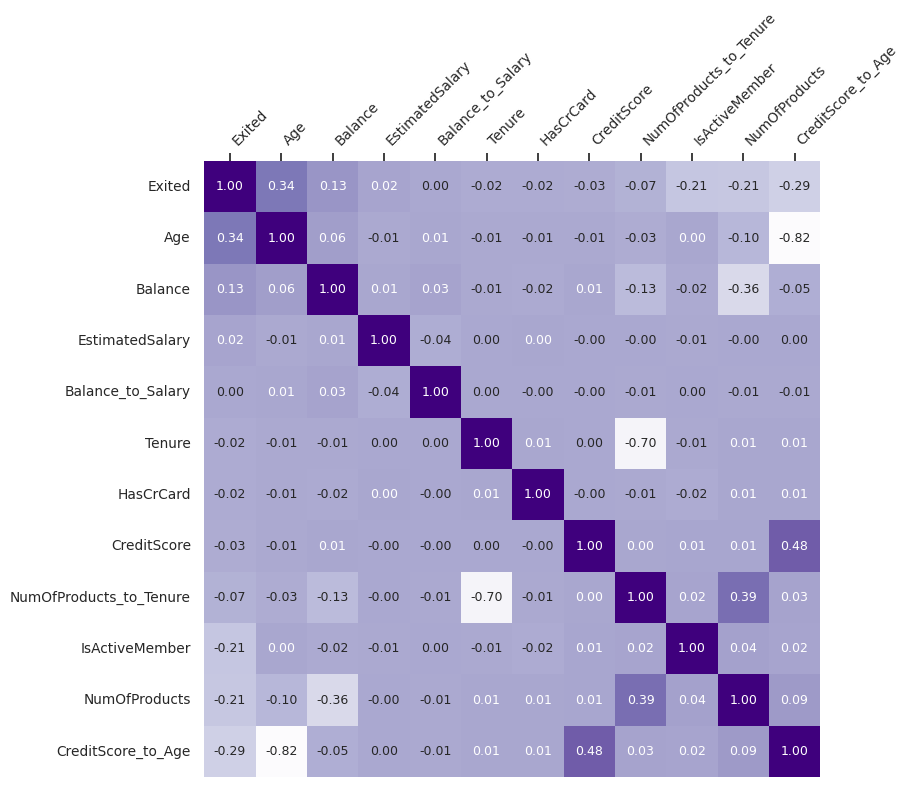

In [16]:
plt.figure(figsize=(8, 8))
k=12
cols = corrmat.nlargest(k, 'Exited')['Exited'].index
cm = np.corrcoef(train_cor[train_cor_num][cols].values.T)
sns.set(font_scale=0.9)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

# standardization 

In [17]:
# numeric variables in feature

feature_num = feature.select_dtypes(include=['int', 'float']).columns
print(feature[feature_num].shape)
feature[feature_num].head()

(165034, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,20.242424,0.500000,0.000000
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,19.000000,1.000000,0.000000
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,16.950000,0.181818,0.000000
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,17.088235,0.333333,1.760655
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,21.696970,0.333333,0.000000


In [18]:
# numeric variables in test data

test_num = test.select_dtypes(include=['int', 'float']).columns
print(test[test_num].shape)
test[test_num].head()

(110023, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,25.478261,0.666667,0.000000
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,14.847826,0.333333,0.000000
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,19.294118,0.250000,0.000000
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,18.916667,0.111111,0.000000
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,19.789474,0.090909,0.869703


In [19]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature[feature_num])

feature_num_st = scaler.transform(feature[feature_num])
feature_num_st = pd.DataFrame(feature_num_st, columns = feature[feature_num].columns)

test_num_st = scaler.transform(test[test_num])
test_num_st = pd.DataFrame(test_num_st, columns = test[test_num].columns)

print(feature_num_st.shape, test_num_st.shape)
feature_num_st.head()

(165034, 11) (110023, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.458488,0.433990,-0.022925
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.191319,2.003848,-0.022925
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,-0.249510,-0.565011,-0.022925
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,-0.219784,-0.089296,-0.003713
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0.771271,-0.089296,-0.022925


# one_hot_encoding

In [20]:
# categoric variables in train data

feature_cat = feature.select_dtypes(include=['object']).columns
feature_cat = feature[feature_cat]
feature_cat.head()

,Geography,Gender
0,France,Male
1,France,Male
2,France,Male
3,France,Male
4,Spain,Male


In [21]:
# categoric variables in test data

test_cat = test.select_dtypes(include=['object']).columns
test_cat = test[test_cat]
test_cat.head()

,Geography,Gender
0,France,Female
1,France,Female
2,France,Female
3,France,Male
4,Germany,Male


In [22]:
# one_hot_encoding for feature_cat

feature_cat_ohe = pd.get_dummies(feature_cat, columns = feature_cat.columns, dtype=int, 
                                 drop_first=True)
feature_cat_ohe.head(2)

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,1
1,0,0,1


In [23]:
# one_hot_encoding for test_cat

test_cat_ohe = pd.get_dummies(test_cat, columns = test_cat.columns, dtype=int, 
                              drop_first=True)
test_cat_ohe.head(2)

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,0,0


# transformed data

In [24]:
# total transformed data

feature_tf = pd.concat([feature_num_st, feature_cat_ohe], axis=1) 
test_tf = pd.concat([test_num_st, test_cat_ohe], axis=1) 
print(feature_tf.shape, test_tf.shape)
feature_tf.head()

(165034, 14) (110023, 14)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary,Geography_Germany,Geography_Spain,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.458488,0.433990,-0.022925,0,0,1
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.191319,2.003848,-0.022925,0,0,1
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,-0.249510,-0.565011,-0.022925,0,0,1
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,-0.219784,-0.089296,-0.003713,0,0,1
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0.771271,-0.089296,-0.022925,0,1,1


In [25]:
target.value_counts() # unbalanced data 21%

Exited
0    130113
1     34921
Name: count, dtype: int64

In [26]:
train_all = pd.concat([feature_tf, target], axis=1) 
train_all

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.458488,0.433990,-0.022925,0,0,1,0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.191319,2.003848,-0.022925,0,0,1,0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,-0.249510,-0.565011,-0.022925,0,0,1,0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,-0.219784,-0.089296,-0.003713,0,0,1,0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0.771271,-0.089296,-0.022925,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957,0.451972,-0.089296,-0.022925,0,1,0,0
165030,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951,0.971601,-0.350940,-0.022925,0,0,1,0
165031,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366,0.024838,-0.612583,-0.022925,0,0,1,0
165032,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217,0.076632,-0.743404,0.001841,0,1,0,0


In [27]:
corrmat = train_all.corr()
corrmat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore_to_Age,NumOfProducts_to_Tenure,Balance_to_Salary,Geography_Germany,Geography_Spain,Gender_Male,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,0.482742,0.003503,-0.000598,0.002996,0.003833,0.002310,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,-0.824948,-0.030754,0.005095,0.093138,-0.012157,-0.063139,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,0.008159,-0.697675,0.000872,-0.007751,0.004085,0.008767,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,-0.047365,-0.127466,0.025970,0.539208,-0.132364,-0.014699,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,0.088165,0.386984,-0.010640,-0.103034,0.025889,0.026098,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,0.006088,-0.006952,-0.000858,-0.004988,-0.014037,0.006418,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,0.020708,0.019213,0.001823,-0.036433,0.014473,0.033722,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.001008,-0.000968,-0.039278,0.013298,-0.010587,-0.007778,0.018827
CreditScore_to_Age,0.482742,-0.824948,0.008159,-0.047365,0.088165,0.006088,0.020708,0.001008,1.000000,0.027029,-0.005163,-0.075715,0.014039,0.049502,-0.287183
NumOfProducts_to_Tenure,0.003503,-0.030754,-0.697675,-0.127466,0.386984,-0.006952,0.019213,-0.000968,0.027029,1.000000,-0.005733,-0.029422,0.009653,0.003107,-0.067816


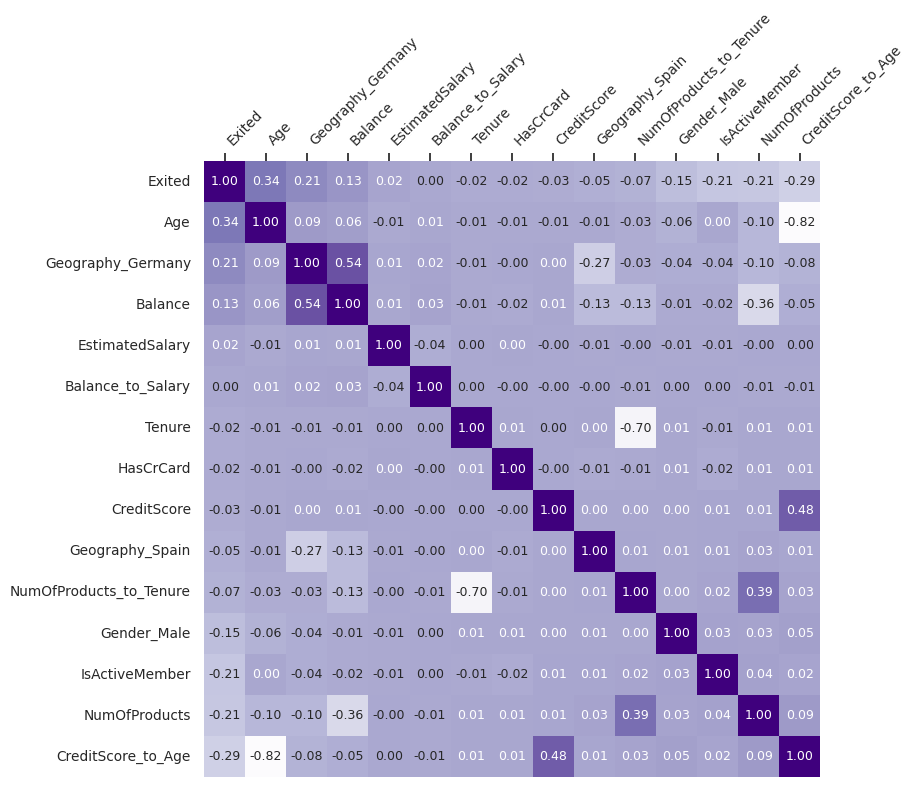

In [28]:
plt.figure(figsize=(8, 8))
k=15
cols = corrmat.nlargest(k, 'Exited')['Exited'].index
cm = np.corrcoef(train_all[cols].values.T)
sns.set(font_scale=0.9)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

- Churn varies quite a bit depending on the region and gender.  Need to EDA

# model_1: initial XGBClassifier 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(feature_tf, target, random_state = 2401)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((123775, 14), (41259, 14), (123775,), (41259,))

In [30]:
from xgboost import XGBClassifier

model_1 = XGBClassifier(booster = 'gbtree')
model_1.fit(X_train, y_train)

pred_1 = model_1.predict_proba(X_val)[:, 1] # pred_1
pred_1[:10]

array([0.34696612, 0.64931697, 0.56105965, 0.01827463, 0.03357518,
       0.8000134 , 0.7874645 , 0.04228355, 0.0737657 , 0.02281378],
      dtype=float32)

In [31]:
pred_label_1 = np.where(pred_1 > 0.5, 1, 0) # pred_label_1
pred_label_1[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_val, pred_label_1)) # pred_label_1
print(classification_report(y_val, pred_label_1)) # pred_label_1

# accuracy 0.87

[[30872  1720]
 [ 3855  4812]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32592
           1       0.74      0.56      0.63      8667

    accuracy                           0.86     41259
   macro avg       0.81      0.75      0.78     41259
weighted avg       0.86      0.86      0.86     41259



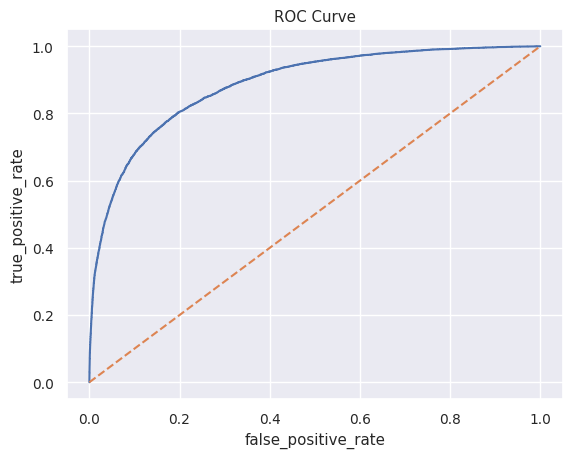

0.8860612390630268

In [33]:
# ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, pred_1) # pred

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

roc_auc_score(y_val, pred_1) # pred_1

# model_2: XGBClassifier with tuned hyperparameters

In [34]:
# hyperparameter tuning

import time
start = time.time()

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [30],       # default 100 [1, inf)
              "learning_rate": [0.2],     # default 0.3 [0, 1]
              "max_depth": [6],           # default 6 [0, inf)
              "min_split_loss":[1],       # default 0 [0, inf)
              "min_child_weight": [3],    # default 1 [0, inf)
              "subsample": [0.7],         # default 1 (0, 1]
              "colsample_bytree": [1],    # default 1 (0, 1]
              "colsample_bylevel": [0.9], # default 1 (0, 1]
              "colsample_bynode": [1],    # default 1 (0, 1]
              "lambda": [0.5],            # default 1 [0, inf)
              "alpha": [4],               # default 0 [0, inf)
             } 

model_2 = XGBClassifier(booster = 'gbtree')
grid_search = GridSearchCV(model_2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The best hyperparameters are ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

end = time.time()
elapsed = end-start
print(elapsed)

# accuracy 0.8654251666330033
# time 1.9968597888946533 sec

The best hyperparameters are  {'alpha': 4, 'colsample_bylevel': 0.9, 'colsample_bynode': 1, 'colsample_bytree': 1, 'lambda': 0.5, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 3, 'min_split_loss': 1, 'n_estimators': 30, 'subsample': 0.7}
Best score:  0.864786911735003
2.530764579772949


In [35]:
model_2 = XGBClassifier(booster = 'gbtree', n_estimators = 30, learning_rate = 0.2, 
                        max_depth = 6, min_split_loss = 1, min_child_weight = 3, 
                        subsample = 0.7, colsample_bytree = 1, colsample_bylevel = 0.9, 
                        colsample_bynode = 1, reg_lambda = 0.5, alpha = 4)
model_2.fit(X_train, y_train)

pred_2 = model_2.predict_proba(X_val)[:, 1] # pred_2
pred_2[:10]

array([0.24948056, 0.6589102 , 0.6393897 , 0.01833382, 0.03788504,
       0.81319165, 0.824771  , 0.04240648, 0.03737974, 0.01672261],
      dtype=float32)

In [36]:
pred_label_2 = np.where(pred_2 > 0.5, 1, 0) # pred_label_2
pred_label_2[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [37]:
print(confusion_matrix(y_val, pred_label_2)) # pred_label_2
print(classification_report(y_val, pred_label_2)) # pred_label_2

[[30958  1634]
 [ 3874  4793]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32592
           1       0.75      0.55      0.64      8667

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



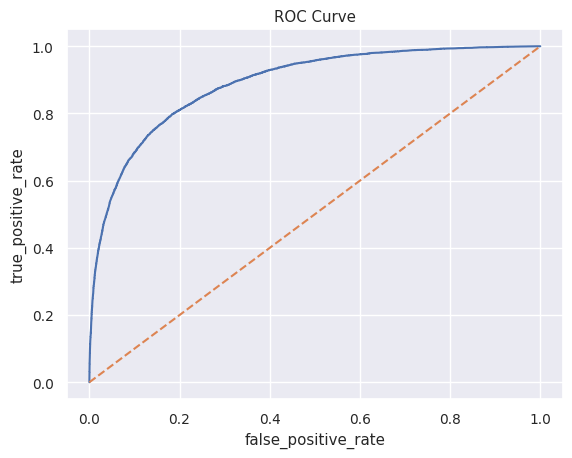

0.8899975857674898

In [38]:
# ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, pred_2) # pred_2

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

roc_auc_score(y_val, pred_2)

# model_3: initial LightGBM

In [39]:
import lightgbm as lgb

model_3 = lgb.LGBMClassifier(random_state=2401)
model_3.fit(X_train, y_train)

pred_3 = model_3.predict_proba(X_val)[:, 1] # pred_3
pred_3[:10]

array([0.22444951, 0.67851376, 0.63796237, 0.01826519, 0.03539553,
       0.81478015, 0.8537487 , 0.04411541, 0.04823416, 0.0192945 ])

In [40]:
pred_label_3 = np.where(pred_3 > 0.5, 1, 0) # pred_label_3
pred_label_3[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [41]:
print(confusion_matrix(y_val, pred_label_3)) # pred_label_3
print(classification_report(y_val, pred_label_3)) # pred_label_3

[[30944  1648]
 [ 3847  4820]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32592
           1       0.75      0.56      0.64      8667

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



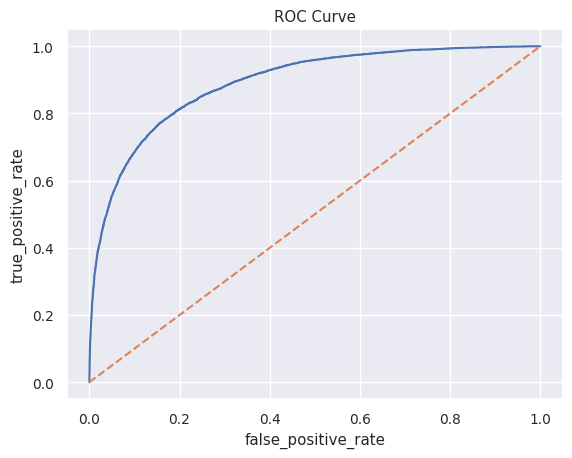

0.8906890773828287

In [42]:
# ROC curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, pred_3) # pred_3

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

roc_auc_score(y_val, pred_3) # pred_3
# 0.890729208387193

# model_4: Light-GBM with tuned hyperparameters

In [43]:
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
start = time.time()

param_grid = {'n_estimators': [135],              # default 100
              'learning_rate': [0.08920],         # default 0.1
              'max_depth': [29],                  # default -1
              'num_leaves': [38],                 # default 31
              'min_child_samples': [20],          # default 20
              'subsample': [0.9042338683390199],  # default 1.0
              'subsample_freq': [6]
             }

model_4 = lgb.LGBMClassifier(random_state=2401)

Randomized_search = RandomizedSearchCV(model_4, param_grid, cv=5, scoring='accuracy')
Randomized_search.fit(X_train, y_train)

print("The best hyperparameters are ", Randomized_search.best_params_)
print("Best score: ", Randomized_search.best_score_)

end = time.time()
elapsed = end-start
print(elapsed)

# 0.87
# accuracy 0.8653928499293071
# time 15 sec

The best hyperparameters are  {'subsample_freq': 6, 'subsample': 0.9042338683390199, 'num_leaves': 38, 'n_estimators': 135, 'min_child_samples': 20, 'max_depth': 29, 'learning_rate': 0.0892}
Best score:  0.8650858412441931
13.75244665145874


In [44]:
model_4 = lgb.LGBMClassifier(random_state=2401, n_estimators = 135, learning_rate = 0.08920, 
                             max_depth = 29, num_leaves = 38, min_child_samples = 20, 
                             subsample = 0.9042338683390199, subsample_freq = 6)
model_4.fit(X_train, y_train)

pred_4 = model_4.predict_proba(X_val)[:, 1] # pred_4
pred_4[:10]

array([0.27542986, 0.70072006, 0.62651549, 0.01785359, 0.0397795 ,
       0.80571408, 0.85921817, 0.03518953, 0.05423352, 0.01666598])

In [45]:
pred_label_4 = np.where(pred_4 > 0.5, 1, 0) # pred_label_4
pred_label_4[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [46]:
print(confusion_matrix(y_val, pred_label_4)) # pred_label_4
print(classification_report(y_val, pred_label_4)) # pred_label_4

[[30943  1649]
 [ 3879  4788]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32592
           1       0.74      0.55      0.63      8667

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



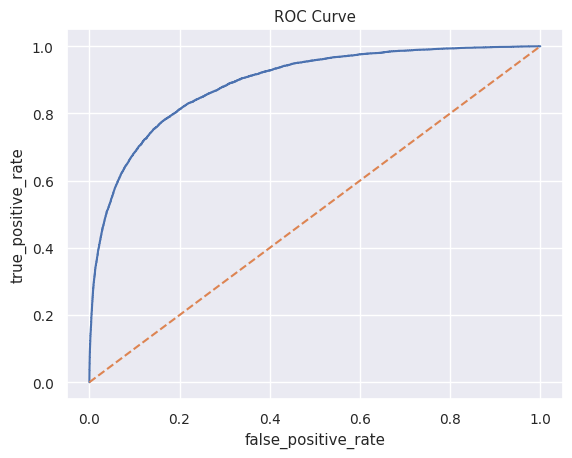

0.8905526139132862

In [47]:
# ROC curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, pred_4) # pred_4

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

roc_auc_score(y_val, pred_4) # pred_4
# 0.890630827952182

# model_5: CatBoost

In [48]:
from catboost import CatBoostClassifier

model_5 = CatBoostClassifier(random_state = 2401)

model_5.fit(X_train, y_train, verbose=0)

pred_5 = model_5.predict_proba(X_val)[:, 1] # pred_1
pred_5[:10]

array([0.27066475, 0.69732114, 0.6164659 , 0.01403969, 0.02803988,
       0.82473916, 0.84988957, 0.04744534, 0.05692183, 0.01653631])

In [49]:
pred_label_5 = np.where(pred_5 > 0.5, 1, 0) # pred_label_5
pred_label_5[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [50]:
print(confusion_matrix(y_val, pred_label_5)) # pred_label_5
print(classification_report(y_val, pred_label_5))

[[30988  1604]
 [ 3942  4725]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32592
           1       0.75      0.55      0.63      8667

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.77     41259
weighted avg       0.86      0.87      0.86     41259



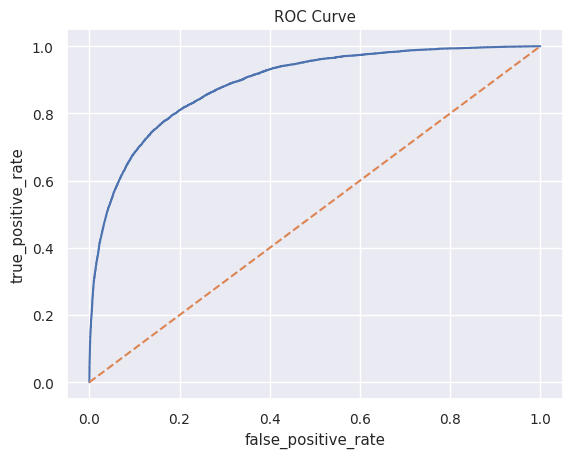

0.8896512947785682

In [51]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, pred_5) # pred_5

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

roc_auc_score(y_val, pred_5)

# model_6: CatBoost with tuned hyperparameters

In [52]:
start = time.time()

param_grid = {'iterations': [800],      # default 500
              'learning_rate': [0.05],  # default 1 
              'depth': [6],             # default 4 
              'l2_leaf_reg': [3],       # default 3
              'max_leaves': [31],       # default 31 
              "min_data_in_leaf": [1]
             } 

model_6 = CatBoostClassifier(random_state=2401, verbose=0)

grid_search = GridSearchCV(model_6, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The best hyperparameters are ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

end = time.time()
elapsed = end-start
print(elapsed)

# 0.87
# accuracy 0.8655705917996365
# time 77 sec

The best hyperparameters are  {'depth': 6, 'iterations': 800, 'l2_leaf_reg': 3, 'learning_rate': 0.05, 'max_leaves': 31, 'min_data_in_leaf': 1}
Best score:  0.8652312664108261
82.69244623184204


In [53]:
model_6 = CatBoostClassifier(iterations = 800, learning_rate = 0.05, depth = 6, 
                             l2_leaf_reg = 3, max_leaves = 31, min_data_in_leaf = 1)

evals = [(X_val, y_val)]
model_6.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=0)  
pred_6 = model_6.predict_proba(X_val)[:, 1]
pred_6[:10]

array([0.26350431, 0.65317667, 0.63625331, 0.01713334, 0.01927429,
       0.81029327, 0.89643231, 0.05240792, 0.04807192, 0.01739216])

In [54]:
pred_label_6 = np.where(pred_6 > 0.5, 1, 0) # pred_label_6
pred_label_6[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [55]:
print(confusion_matrix(y_val, pred_label_6)) # pred_label_6
print(classification_report(y_val, pred_label_6)) # pred_label_6

[[31040  1552]
 [ 3952  4715]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32592
           1       0.75      0.54      0.63      8667

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



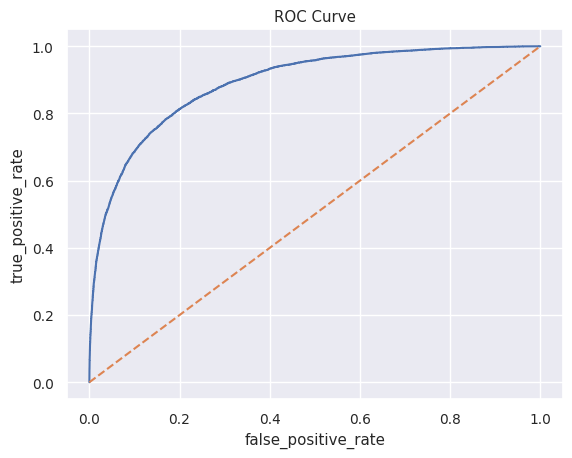

0.8911692280697939

In [56]:
# ROC curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, pred_6) # pred_6

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

roc_auc_score(y_val, pred_6) # pred_6
# 0.891420514145287

- roc_auc_score
- model_1 0.8870312351048695 0.8863196195750712
- model_2 0.8904981294194021 0.889784731430121
- model_3 0.890729208387193 0.8902155856954409
- model_4 0.890630827952182 0.890630827952182
- model_5 0.8899584725528003 0.8897544650202929
- model_6 0.891420514145287 0.891420514145287

# weight model blending

In [57]:
wmb_pred = (0.15*model_2.predict_proba(X_val)[:,1] + 
            0.15*model_4.predict_proba(X_val)[:,1] + 
            0.70*model_6.predict_proba(X_val)[:,1])


roc_auc_score(y_val, wmb_pred)
# 0.8915367828976104

0.8912893732732269

In [58]:
wmb_pred

array([0.26318958, 0.66116821, 0.63526309, ..., 0.11054173, 0.11274536,
       0.04466343])

# submission

In [59]:
pred_test = (0.15*model_2.predict_proba(test_tf)[:,1] + 
             0.15*model_4.predict_proba(test_tf)[:,1] + 
             0.70*model_6.predict_proba(test_tf)[:,1]) # pred_test
pred_test[:10]

array([0.02171194, 0.83193997, 0.02873436, 0.22971811, 0.35358016,
       0.04551639, 0.04152192, 0.0882205 , 0.54843064, 0.00982943])

In [60]:
submission = pd.DataFrame({'id': test_df.id, 'Exited': pred_test})
print(submission.shape)
submission.head()

(110023, 2)


,id,Exited
0,165034,0.021712
1,165035,0.831940
2,165036,0.028734
3,165037,0.229718
4,165038,0.353580


In [61]:
submission.to_csv('submission.csv', index=False)